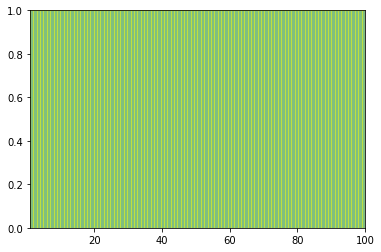

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.path as path
import matplotlib.animation as animation
from matplotlib import rc

fig, ax = plt.subplots()

# histogram our data with numpy
data = np.arange(1,101)
np.random.shuffle(arr)
n, bins = np.histogram(data, 100)

# get the corner of the rectangles for the histogram
left = np.array(bins[:-1])
right = np.array(bins[1:])
bottom = np.zeros(len(left))
top = bottom + n
nrects = len(left)

# here comes the tricky part -- we have to set up the vertex and path
# codes arrays using moveto, lineto and closepoly

# for each rect: 1 for the MOVETO, 3 for the LINETO, 1 for the
# CLOSEPOLY; the vert for the closepoly is ignored but we still need
# it to keep the codes aligned with the vertices
nverts = nrects*(1 + 3 + 1)
verts = np.zeros((nverts, 2))
codes = np.ones(nverts, int) * path.Path.LINETO
codes[0::5] = path.Path.MOVETO
codes[4::5] = path.Path.CLOSEPOLY
verts[0::5, 0] = left
verts[0::5, 1] = bottom
verts[1::5, 0] = left
verts[1::5, 1] = top
verts[2::5, 0] = right
verts[2::5, 1] = top
verts[3::5, 0] = right
verts[3::5, 1] = bottom

barpath = path.Path(verts, codes)
patch = patches.PathPatch(
    barpath, facecolor='green', edgecolor='yellow', alpha=0.5)
ax.add_patch(patch)

ax.set_xlim(left[0], right[-1])
ax.set_ylim(bottom.min(), top.max())

def animate(i):
    # simulate new data coming in
    data = np.arange(1, 101)
    n, bins = np.histogram(data, 100)
    top = bottom + n
    verts[1::5, 1] = top
    verts[2::5, 1] = top
    return [patch, ]

anim = animation.FuncAnimation(fig, animate, 100, repeat=False, blit=True)

In [25]:
bins

array([  1.  ,   1.99,   2.98,   3.97,   4.96,   5.95,   6.94,   7.93,
         8.92,   9.91,  10.9 ,  11.89,  12.88,  13.87,  14.86,  15.85,
        16.84,  17.83,  18.82,  19.81,  20.8 ,  21.79,  22.78,  23.77,
        24.76,  25.75,  26.74,  27.73,  28.72,  29.71,  30.7 ,  31.69,
        32.68,  33.67,  34.66,  35.65,  36.64,  37.63,  38.62,  39.61,
        40.6 ,  41.59,  42.58,  43.57,  44.56,  45.55,  46.54,  47.53,
        48.52,  49.51,  50.5 ,  51.49,  52.48,  53.47,  54.46,  55.45,
        56.44,  57.43,  58.42,  59.41,  60.4 ,  61.39,  62.38,  63.37,
        64.36,  65.35,  66.34,  67.33,  68.32,  69.31,  70.3 ,  71.29,
        72.28,  73.27,  74.26,  75.25,  76.24,  77.23,  78.22,  79.21,
        80.2 ,  81.19,  82.18,  83.17,  84.16,  85.15,  86.14,  87.13,
        88.12,  89.11,  90.1 ,  91.09,  92.08,  93.07,  94.06,  95.05,
        96.04,  97.03,  98.02,  99.01, 100.  ])

In [26]:
anim._repr_html_() is None
rc('animation', html='jshtml')

In [23]:
anim